# Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import ValidationCurve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [5]:
df.describe(include="all")

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

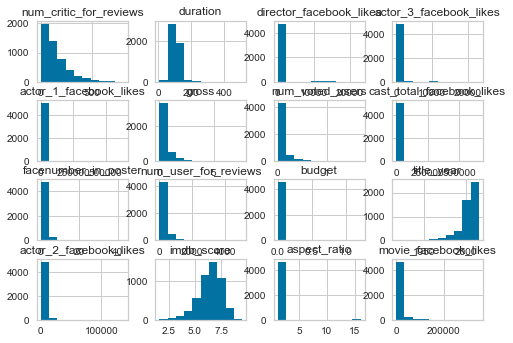

In [6]:
df.hist()

In [7]:
df["imdb_score"].isna().sum()

0

# Preprocess Data

dropping na values for imbd_score

In [8]:
df = df.dropna(subset=["imdb_score"], axis=0)
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
duration                      0.297442
actor_2_name                  0.257783
facenumber_in_poster          0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
imdb_score                    0.000000
movie_title                   0.000000
num_voted_users               0.000000
movie_imdb_link               0.000000
genres                        0.000000
cast_total_facebook_likes

Remove the in-between imdb_score of low and high

In [9]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)

<AxesSubplot:xlabel='imdb_score', ylabel='count'>

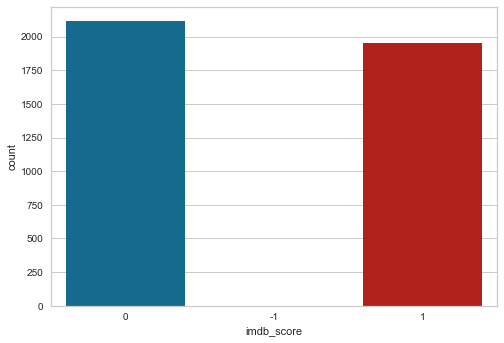

In [10]:
sns.countplot(x="imdb_score", data=df)

array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

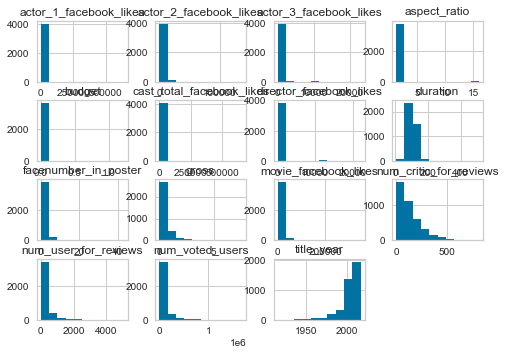

In [12]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X.hist()

In [13]:
y.head()

0    1
1    1
3    1
4    1
6    0
Name: imdb_score, dtype: category
Categories (3, int64): [0 < -1 < 1]

In [14]:
X.skew().sort_values()

title_year                   -2.285178
num_critic_for_reviews        1.586729
duration                      2.340845
gross                         3.263847
num_voted_users               3.898543
num_user_for_reviews          3.947423
facenumber_in_poster          4.800338
movie_facebook_likes          5.038857
director_facebook_likes       5.222487
actor_3_facebook_likes        7.387926
aspect_ratio                  9.063887
actor_2_facebook_likes       11.361543
cast_total_facebook_likes    14.099733
actor_1_facebook_likes       20.399645
budget                       43.822763
dtype: float64

In [15]:
X.isna().sum().sort_values(ascending=False) / len(X) * 100

gross                        19.080403
budget                       10.130317
aspect_ratio                  6.810917
content_rating                6.466683
plot_keywords                 3.319400
title_year                    2.434227
director_facebook_likes       2.335874
director_name                 2.335874
num_critic_for_reviews        1.180231
num_user_for_reviews          0.491763
actor_3_facebook_likes        0.491763
actor_3_name                  0.491763
facenumber_in_poster          0.319646
duration                      0.319646
actor_2_name                  0.295058
actor_2_facebook_likes        0.295058
language                      0.245881
actor_1_name                  0.147529
actor_1_facebook_likes        0.147529
country                       0.098353
genres                        0.000000
movie_facebook_likes          0.000000
movie_imdb_link               0.000000
movie_title                   0.000000
cast_total_facebook_likes     0.000000
num_voted_users          

# Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,content_rating,...,gross,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
3813,1000.0,James Frain,266.0,Sofia Black-D'Elia,126.0,Lisa Kay,NaN,5000000.0,1681,R,...,NaN,English,190,http://www.imdb.com/title/tt1554921/?ref_=fn_t...,Born of War,8.0,3.0,237,fight|mina|murder|revenge|terrorist,2014.0
4345,405.0,Paul McGillion,217.0,Mike 'The Miz' Mizanin,164.0,David Lewis,1.78,1950000.0,1204,R,...,NaN,English,620,http://www.imdb.com/title/tt3528666/?ref_=fn_t...,The Marine 4: Moving Target,23.0,15.0,2032,killed in police car|mercenary|police officer ...,2015.0
2981,537.0,Melanie Griffith,255.0,Aleksa Palladino,99.0,Greg Mottola,1.66,12000000.0,943,R,...,5032496.0,English,652,http://www.imdb.com/title/tt0120533/?ref_=fn_t...,Celebrity,114.0,161.0,20576,celebrity|journalist|lesbian kiss|strong femal...,1998.0
2627,1000.0,Madeline Carroll,431.0,Tessa Thompson,383.0,Brian Geraghty,2.35,15000000.0,2452,PG-13,...,47860214.0,English,0,http://www.imdb.com/title/tt0455857/?ref_=fn_t...,When a Stranger Calls,152.0,468.0,34711,babysitting|cell phone|high school|nightmare|t...,2006.0
4121,1000.0,Johnny Pacar,902.0,Eric Stoltz,847.0,Brendan Fehr,NaN,3000000.0,4374,R,...,73678.0,English,348,http://www.imdb.com/title/tt1282046/?ref_=fn_t...,Fort McCoy,8.0,8.0,266,NaN,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,883.0,Archie Panjabi,430.0,Danny Huston,151.0,Donald Sumpter,1.85,15000000.0,1565,R,...,33565375.0,English,0,http://www.imdb.com/title/tt0387131/?ref_=fn_t...,The Constant Gardener,226.0,568.0,111351,death|diplomat|doctor|kenya|murder,2005.0
1223,164000.0,Krista Allen,137000.0,Andrew Fiscella,748.0,Shantel VanSanten,2.35,40000000.0,303717,R,...,66466372.0,English,0,http://www.imdb.com/title/tt1144884/?ref_=fn_t...,The Final Destination,221.0,290.0,75345,attempted suicide|car crash|collapsing scaffol...,2009.0
3261,4000.0,Hayden Christensen,4000.0,Jordana Brewster,262.0,Akon,NaN,10000000.0,9432,R,...,NaN,English,0,http://www.imdb.com/title/tt2923316/?ref_=fn_t...,American Heist,30.0,42.0,12372,bank|critically bashed|heist|mechanic|prison,2014.0
2222,26000.0,Jason Statham,811.0,Saffron Burrows,287.0,Daniel Mays,2.35,20000000.0,27755,R,...,30028592.0,English,0,http://www.imdb.com/title/tt0200465/?ref_=fn_t...,The Bank Job,222.0,189.0,152247,chase|heist|london england|mobster|safe deposit,2008.0


# Fill na values

In [17]:
X_train_median = X_train.select_dtypes(include='number').median()
X_train_mode = X_train.select_dtypes(include='object').mode().iloc[0]
X_train = X_train.fillna(X_train_median)
X_train = X_train.fillna(X_train_mode)
X_test = X_test.fillna(X_train_median)
X_test = X_test.fillna(X_train_mode)
X_train.isna().sum() + X_test.isna().sum()


actor_1_facebook_likes       0
actor_1_name                 0
actor_2_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
actor_3_name                 0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
content_rating               0
country                      0
director_facebook_likes      0
director_name                0
duration                     0
facenumber_in_poster         0
genres                       0
gross                        0
language                     0
movie_facebook_likes         0
movie_imdb_link              0
movie_title                  0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
plot_keywords                0
title_year                   0
dtype: int64

### Drop features

#### Dropping unnecessary columns such as imdb link, names

In [18]:
to_drop = [
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "director_name",
           "movie_imdb_link",
           "movie_title"
]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
language                      object
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

Lets take a look at some interesting features

#### Language

In [19]:
value_counts = X_train["language"].value_counts()
value_counts

English       3023
French          49
Hindi           24
Spanish         21
Mandarin        16
Japanese        13
German          13
Italian          9
Russian          8
Korean           6
Portuguese       6
Cantonese        5
Arabic           4
Polish           4
Dutch            4
Hebrew           4
Persian          4
Danish           3
Swedish          3
Chinese          3
Norwegian        3
Thai             2
Indonesian       2
None             2
Dari             2
Zulu             2
Icelandic        2
Aramaic          1
Czech            1
Dzongkha         1
Romanian         1
Swahili          1
Bosnian          1
Aboriginal       1
Maya             1
Greek            1
Urdu             1
Telugu           1
Kannada          1
Vietnamese       1
Mongolian        1
Hungarian        1
Kazakh           1
Name: language, dtype: int64

<AxesSubplot:xlabel='language', ylabel='count'>

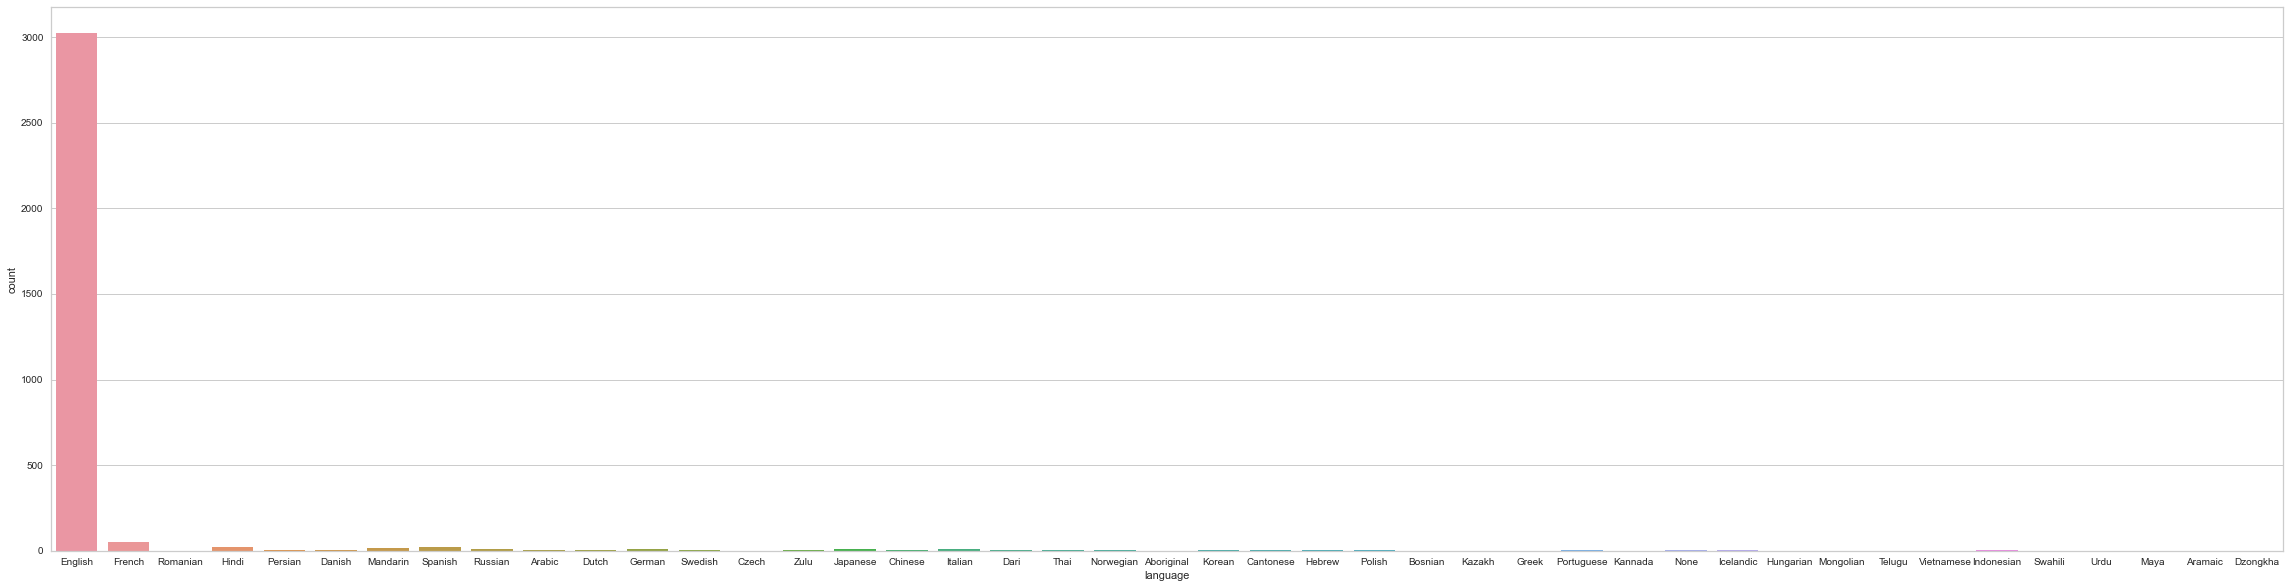

In [20]:
plt.figure(figsize=(40,10))
sns.countplot(x="language", data=X_train)

View columns in percentage

In [21]:
X_train['language'].value_counts(normalize=True) * 100

English       92.929603
French         1.506302
Hindi          0.737781
Spanish        0.645558
Mandarin       0.491854
Japanese       0.399631
German         0.399631
Italian        0.276668
Russian        0.245927
Korean         0.184445
Portuguese     0.184445
Cantonese      0.153704
Arabic         0.122963
Polish         0.122963
Dutch          0.122963
Hebrew         0.122963
Persian        0.122963
Danish         0.092223
Swedish        0.092223
Chinese        0.092223
Norwegian      0.092223
Thai           0.061482
Indonesian     0.061482
None           0.061482
Dari           0.061482
Zulu           0.061482
Icelandic      0.061482
Aramaic        0.030741
Czech          0.030741
Dzongkha       0.030741
Romanian       0.030741
Swahili        0.030741
Bosnian        0.030741
Aboriginal     0.030741
Maya           0.030741
Greek          0.030741
Urdu           0.030741
Telugu         0.030741
Kannada        0.030741
Vietnamese     0.030741
Mongolian      0.030741
Hungarian      0

English accounts for about 93%, this data is unusable since it's heavily skewed. Dropping this data is the best option

In [22]:
X_train = X_train.drop("language", axis=1)
X_test = X_test.drop("language", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Country

In [23]:
value_counts = X_train["country"].value_counts()
value_counts

USA                     2449
UK                       279
France                    99
Canada                    79
Germany                   65
Australia                 35
India                     30
Spain                     21
China                     20
Italy                     17
Japan                     15
Hong Kong                 11
New Zealand               11
South Korea               10
Russia                     8
Ireland                    7
Mexico                     7
South Africa               7
Denmark                    6
Brazil                     5
Norway                     5
Netherlands                5
Thailand                   4
Sweden                     4
Poland                     4
Belgium                    4
Iran                       3
Romania                    3
Switzerland                3
Iceland                    3
Israel                     3
Hungary                    2
Czech Republic             2
Cameroon                   1
Aruba         

View country in percentage

In [24]:
value_counts = X_train["country"].value_counts() / X_train.shape[0] * 100
value_counts

USA                     75.284353
UK                       8.576698
France                   3.043345
Canada                   2.428528
Germany                  1.998156
Australia                1.075930
India                    0.922226
Spain                    0.645558
China                    0.614817
Italy                    0.522595
Japan                    0.461113
Hong Kong                0.338149
New Zealand              0.338149
South Korea              0.307409
Russia                   0.245927
Ireland                  0.215186
Mexico                   0.215186
South Africa             0.215186
Denmark                  0.184445
Brazil                   0.153704
Norway                   0.153704
Netherlands              0.153704
Thailand                 0.122963
Sweden                   0.122963
Poland                   0.122963
Belgium                  0.122963
Iran                     0.092223
Romania                  0.092223
Switzerland              0.092223
Iceland       

<AxesSubplot:xlabel='country', ylabel='count'>

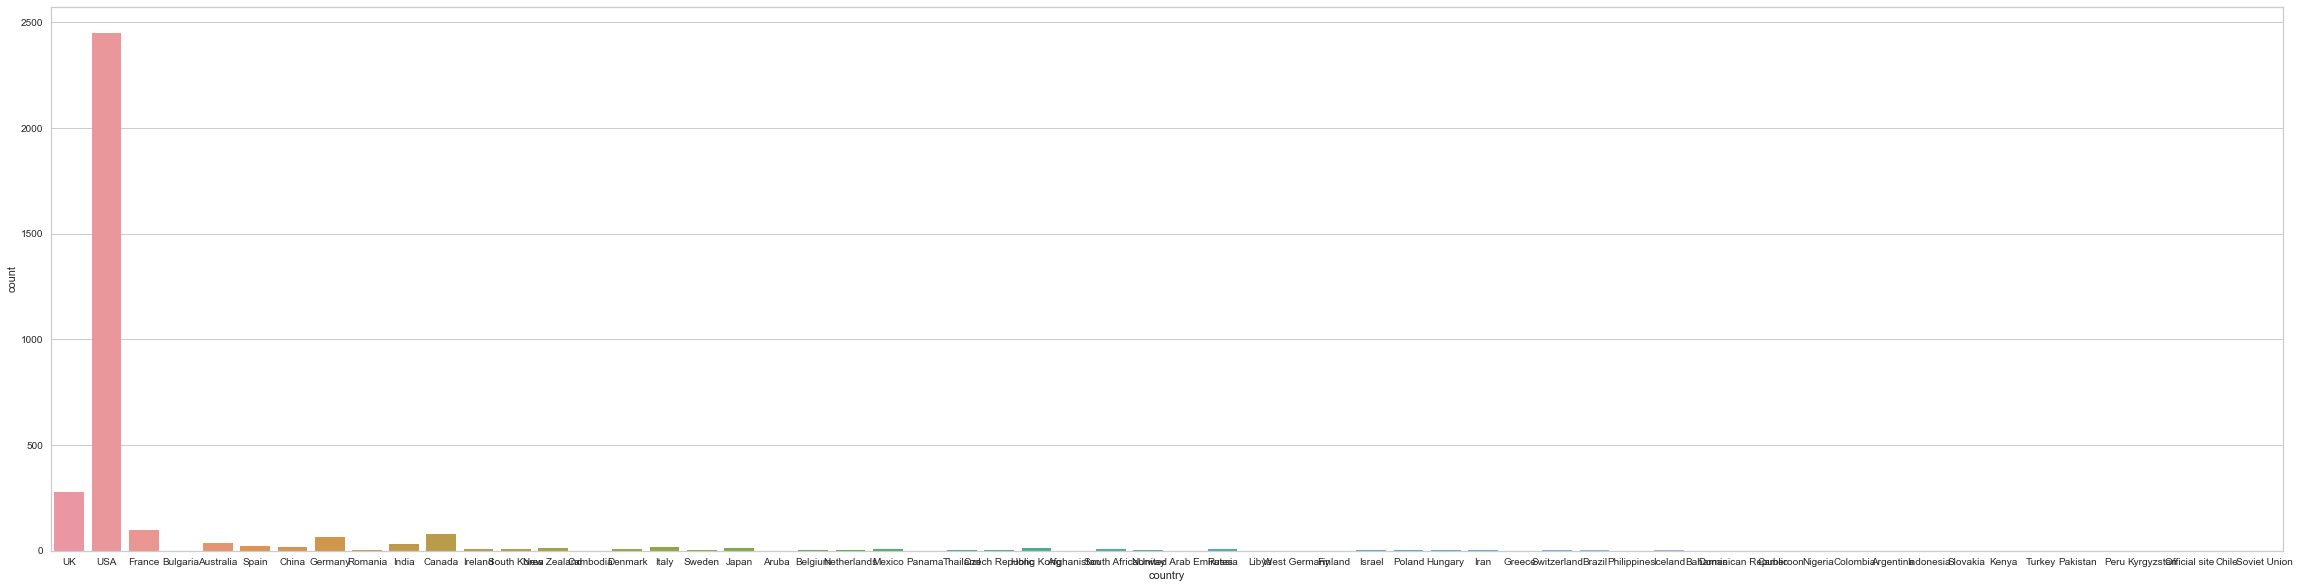

In [25]:
plt.figure(figsize=(40,10))
sns.countplot(x="country", data=X_train)

The 3 dominant countries are USA, UK, and France. Other countries should be recognized as "other" as it's less relevant than the 3

In [26]:
def process_country(X):
  top_three = ["USA","UK","France"]
  X["country"] = X["country"].where(X["country"].isin(top_three), "others")
  return X
X_train = process_country(X_train)
X_test = process_country(X_test)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,content_rating,country,director_facebook_likes,duration,facenumber_in_poster,genres,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
3813,1000.0,266.0,126.0,2.35,5000000.0,1681,R,UK,3.0,109.0,3.0,Action|Drama|Thriller|War,25000000.0,190,8.0,3.0,237,fight|mina|murder|revenge|terrorist,2014.0
4345,405.0,217.0,164.0,1.78,1950000.0,1204,R,USA,58.0,90.0,2.0,Action|Thriller,25000000.0,620,23.0,15.0,2032,killed in police car|mercenary|police officer ...,2015.0
2981,537.0,255.0,99.0,1.66,12000000.0,943,R,USA,11000.0,113.0,0.0,Comedy|Drama,5032496.0,652,114.0,161.0,20576,celebrity|journalist|lesbian kiss|strong femal...,1998.0
2627,1000.0,431.0,383.0,2.35,15000000.0,2452,PG-13,USA,165.0,87.0,0.0,Horror|Thriller,47860214.0,0,152.0,468.0,34711,babysitting|cell phone|high school|nightmare|t...,2006.0
4121,1000.0,902.0,847.0,2.35,3000000.0,4374,R,USA,27.0,100.0,1.0,Drama|History|War,73678.0,348,8.0,8.0,266,based on novel,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,883.0,430.0,151.0,1.85,15000000.0,1565,R,UK,353.0,129.0,0.0,Drama|Mystery|Romance|Thriller,33565375.0,0,226.0,568.0,111351,death|diplomat|doctor|kenya|murder,2005.0
1223,164000.0,137000.0,748.0,2.35,40000000.0,303717,R,USA,160.0,82.0,0.0,Horror,66466372.0,0,221.0,290.0,75345,attempted suicide|car crash|collapsing scaffol...,2009.0
3261,4000.0,4000.0,262.0,2.35,10000000.0,9432,R,others,9.0,94.0,1.0,Action|Crime|Drama|Thriller,25000000.0,0,30.0,42.0,12372,bank|critically bashed|heist|mechanic|prison,2014.0
2222,26000.0,811.0,287.0,2.35,20000000.0,27755,R,UK,79.0,111.0,0.0,Crime|Drama|Romance|Thriller,30028592.0,0,222.0,189.0,152247,chase|heist|london england|mobster|safe deposit,2008.0


#### Genres

<AxesSubplot:xlabel='genres', ylabel='count'>

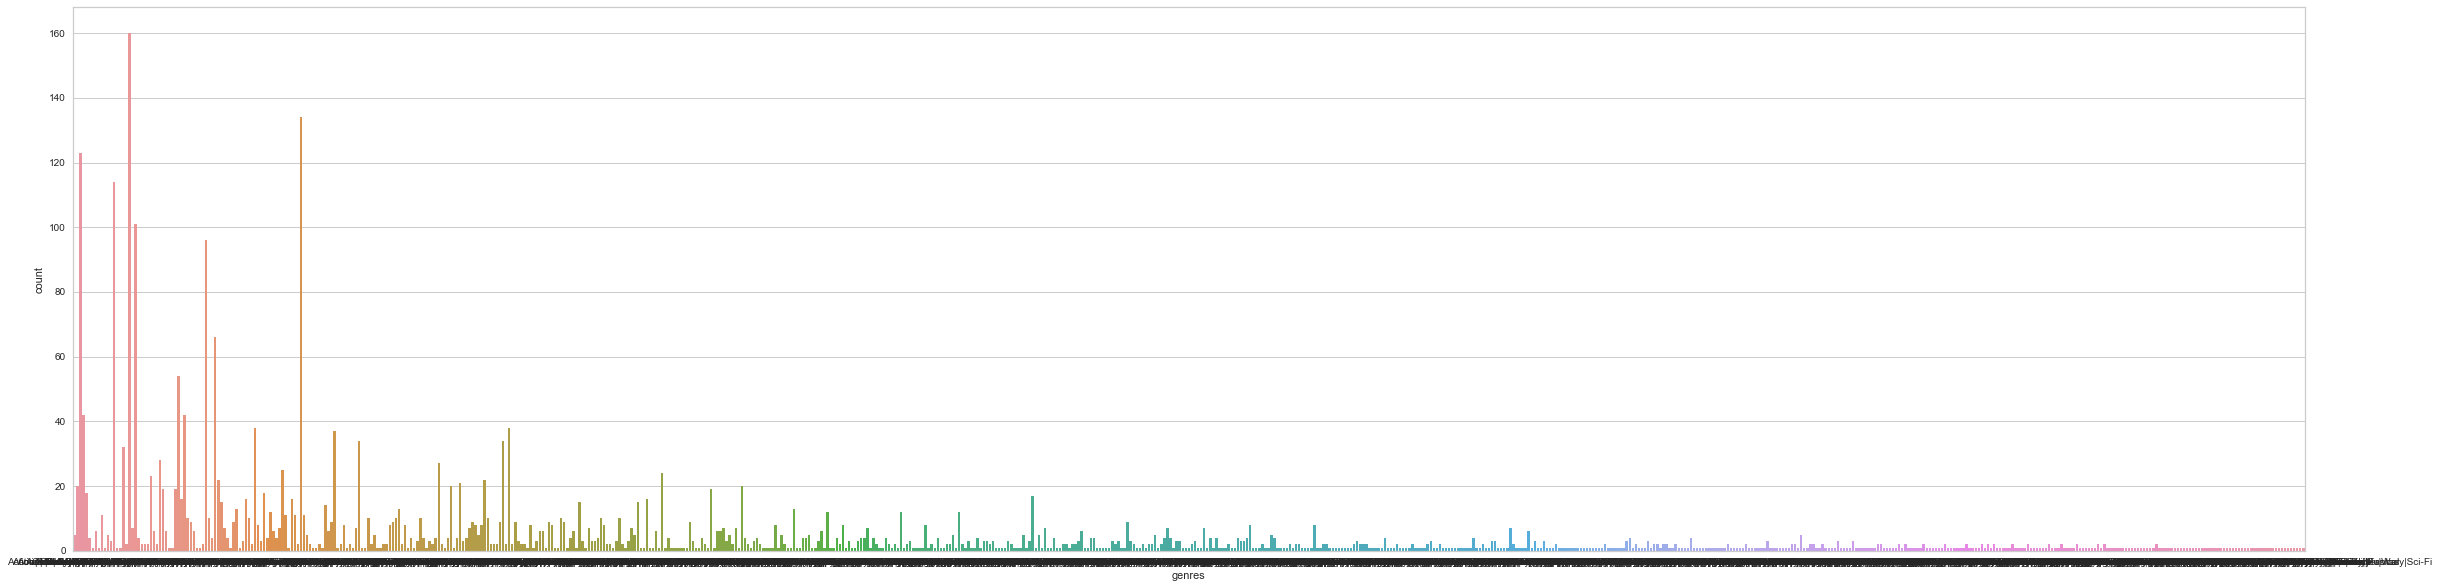

In [27]:
plt.figure(figsize=(40,10))
sns.countplot(x=X_train.genres) 

Genres are too complicated and interconnected, dropping this data as for right now

In [34]:
X_train = X_train.drop("genres", axis=1)
X_test = X_test.drop("genres",axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Content Rating

View content rating in percentage

In [35]:
value_counts = X_train["content_rating"].value_counts() / X_train.shape[0] * 100
value_counts

R            47.709806
PG-13        28.927144
PG           13.741162
Not Rated     2.490009
G             2.244082
Unrated       1.260375
Approved      1.075930
TV-14         0.614817
TV-MA         0.461113
TV-PG         0.368890
X             0.307409
TV-G          0.245927
Passed        0.184445
NC-17         0.153704
GP            0.092223
M             0.061482
TV-Y          0.030741
TV-Y7         0.030741
Name: content_rating, dtype: float64

<AxesSubplot:xlabel='content_rating', ylabel='count'>

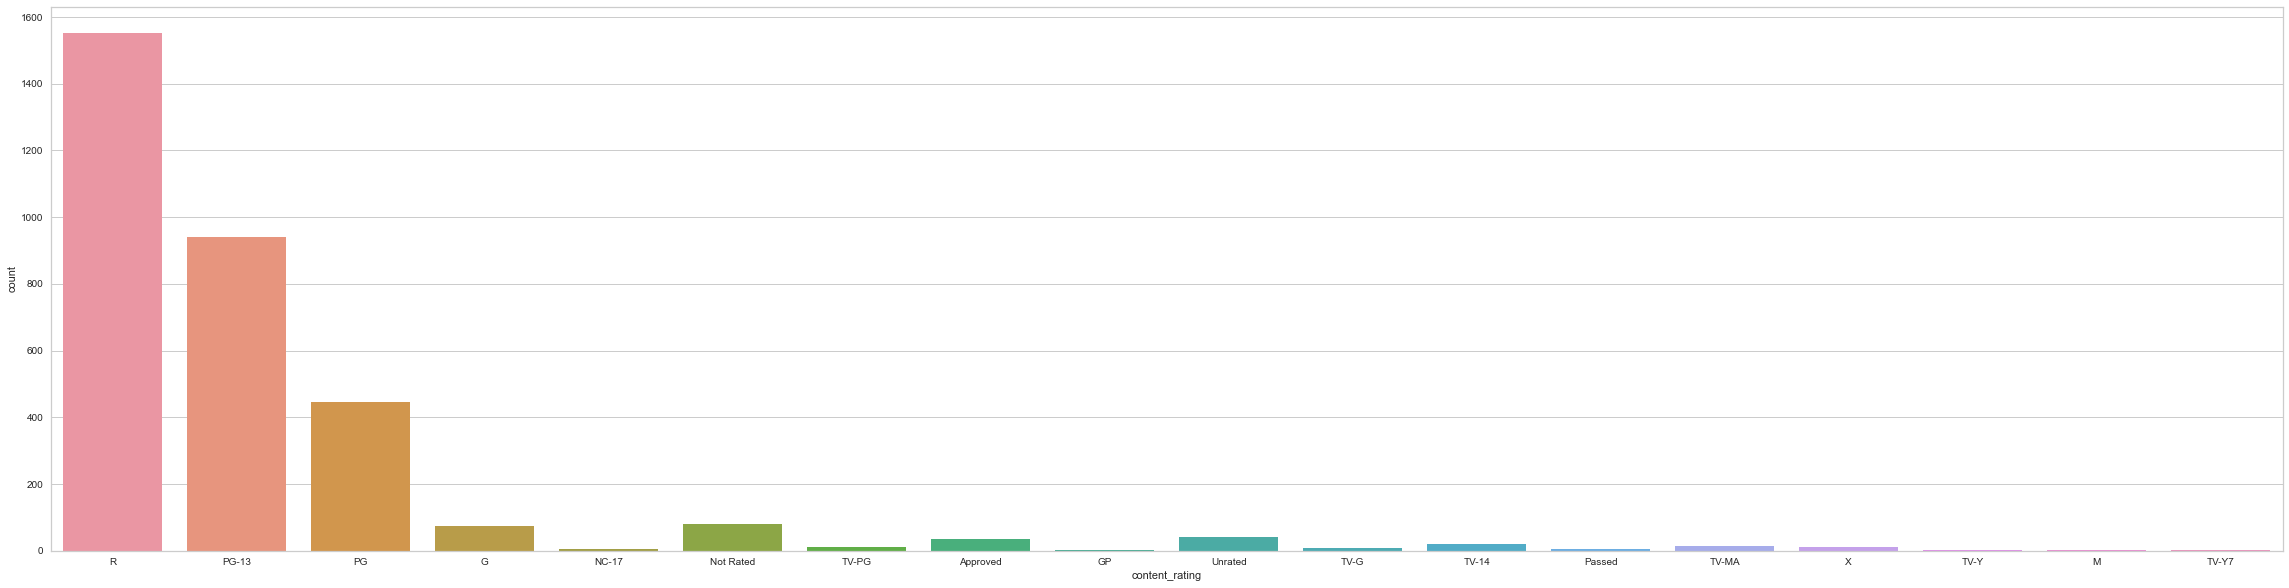

In [36]:
plt.figure(figsize=(40,10))
sns.countplot(x="content_rating", data=X_train)

R, PG, PG-13 are the 3 most dominant values in rating. Group the rest as "others"

In [37]:
def process_content_rating(X):
  top_three = ["R","PG", "PG-13"]
  X["content_rating"] = X["content_rating"].where(X["content_rating"].isin(top_three), "others")
  return X
X_train = process_content_rating(X_train)
X_test = process_content_rating(X_test)
X_train["content_rating"]

3813        R
4345        R
2981        R
2627    PG-13
4121        R
        ...  
1865        R
1223        R
3261        R
2222        R
540         R
Name: content_rating, Length: 3253, dtype: object

In [38]:
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
plot_keywords                 object
title_year                   float64
dtype: object

#### Plot keywords

In [39]:
value_counts = X_train["plot_keywords"].value_counts()
value_counts

based on novel                                                                     116
assistant|experiment|frankenstein|medical student|scientist                          3
1940s|child hero|fantasy world|orphan|reference to peter pan                         3
freddy krueger|lucid dream|serial killer|slasher|sleep deprivation                   2
coma|mysterious villain|police chase|shooting range|sniper                           2
                                                                                  ... 
car racing|crush|hustler|scam|watching television                                    1
dog|marriage|search|wedding|woods                                                    1
eugene oregon|independent film|obsession                                             1
christmas|resort|thailand|tourist|tsunami                                            1
based on manga|biker gang|gifted child|post thermonuclear war|science runs amok      1
Name: plot_keywords, Length: 3071, dtype: i

Same as genres, data is too complex and interconnected. Dropping this value

In [40]:
X_train = X_train.drop("plot_keywords", axis=1)
X_test = X_test.drop("plot_keywords", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes      int64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes           int64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
title_year                   float64
dtype: object

### Encoding

#### Integer to Float

In [41]:
def int_to_float(X):
    X_copy = X.copy()
    int_cols = X_copy.select_dtypes(include=["int"]).columns
    X_copy[int_cols] = X_copy[int_cols].apply(lambda x: x.astype("float"))
    return X_copy
X_train = int_to_float(X_train)
X_test = int_to_float(X_test)
X_train.dtypes


actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

#### String to One-hot

In [42]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,...,num_voted_users,title_year,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_others,country_France,country_UK,country_USA,country_others
3813,1000.0,266.0,126.0,2.35,5000000.0,1681.0,3.0,109.0,3.0,25000000.0,...,237.0,2014.0,0,0,1,0,0,1,0,0
4345,405.0,217.0,164.0,1.78,1950000.0,1204.0,58.0,90.0,2.0,25000000.0,...,2032.0,2015.0,0,0,1,0,0,0,1,0
2981,537.0,255.0,99.0,1.66,12000000.0,943.0,11000.0,113.0,0.0,5032496.0,...,20576.0,1998.0,0,0,1,0,0,0,1,0
2627,1000.0,431.0,383.0,2.35,15000000.0,2452.0,165.0,87.0,0.0,47860214.0,...,34711.0,2006.0,0,1,0,0,0,0,1,0
4121,1000.0,902.0,847.0,2.35,3000000.0,4374.0,27.0,100.0,1.0,73678.0,...,266.0,2011.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,883.0,430.0,151.0,1.85,15000000.0,1565.0,353.0,129.0,0.0,33565375.0,...,111351.0,2005.0,0,0,1,0,0,1,0,0
1223,164000.0,137000.0,748.0,2.35,40000000.0,303717.0,160.0,82.0,0.0,66466372.0,...,75345.0,2009.0,0,0,1,0,0,0,1,0
3261,4000.0,4000.0,262.0,2.35,10000000.0,9432.0,9.0,94.0,1.0,25000000.0,...,12372.0,2014.0,0,0,1,0,0,0,0,1
2222,26000.0,811.0,287.0,2.35,20000000.0,27755.0,79.0,111.0,0.0,30028592.0,...,152247.0,2008.0,0,0,1,0,0,1,0,0


# Model

## Decision Tree Model

In [43]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [45]:
print("Classification Report: \n",metrics.classification_report(y_test,y_pred),'\n')

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       428
           1       0.77      0.80      0.79       386

    accuracy                           0.79       814
   macro avg       0.79      0.79      0.79       814
weighted avg       0.79      0.79      0.79       814
 



Classification Report: 
               precision    recall  f1-score   support

         low       0.81      0.79      0.80       428
        high       0.77      0.80      0.79       386

    accuracy                           0.79       814
   macro avg       0.79      0.79      0.79       814
weighted avg       0.79      0.79      0.79       814
 

Accuracy on train:   1.0 

Accuracy on test:  0.794 



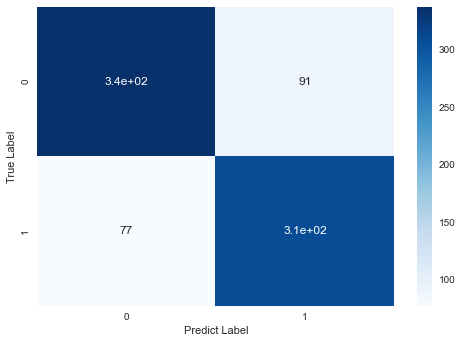

In [86]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred, target_names=["low","high"]),'\n')
print("Accuracy on train:  ",dt.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",dt.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

[Text(336.14826231992663, 291.8614285714286, 'num_voted_users <= 142444.0\nentropy = 0.999\nsamples = 3253\nvalue = [1687, 1566]\nclass = 0'),
 Text(256.73231562052615, 277.62428571428575, 'duration <= 111.5\nentropy = 0.967\nsamples = 2668\nvalue = [1617, 1051]\nclass = 0'),
 Text(174.1810593011811, 263.38714285714286, 'budget <= 18250000.0\nentropy = 0.895\nsamples = 1956\nvalue = [1347, 609]\nclass = 0'),
 Text(106.00957744273444, 249.15, 'num_voted_users <= 32810.0\nentropy = 0.973\nsamples = 1284\nvalue = [766, 518]\nclass = 0'),
 Text(30.04005681818182, 234.91285714285715, 'duration <= 65.5\nentropy = 0.912\nsamples = 986\nvalue = [663, 323]\nclass = 0'),
 Text(8.947172512526844, 220.6757142857143, 'num_critic_for_reviews <= 5.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]\nclass = 1'),
 Text(6.390837508947746, 206.43857142857144, 'actor_2_facebook_likes <= 585.0\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = 1'),
 Text(5.112670007158196, 192.20142857142858, 'aspect_ra

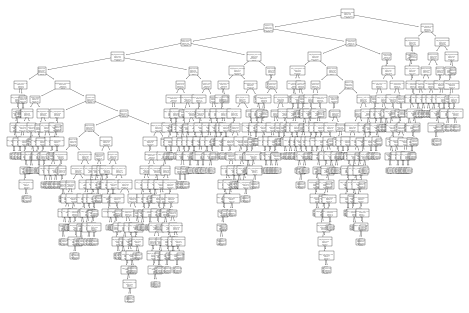

In [49]:
plot_tree(dt,feature_names=X_train.columns,class_names=dt.classes_.astype(str))

In [55]:
#dataframe of column name and dt feature importance
pd.DataFrame({"columns":X_train.columns,"importance":dt.feature_importances_}).sort_values("importance",ascending=False)

,columns,importance
13,num_voted_users,0.243153
4,budget,0.118989
7,duration,0.103300
9,gross,0.075840
14,title_year,0.054563
11,num_critic_for_reviews,0.052327
12,num_user_for_reviews,0.051074
2,actor_3_facebook_likes,0.050989
1,actor_2_facebook_likes,0.039647
6,director_facebook_likes,0.036932


In [56]:
metrics.roc_auc_score(y_test,y_pred,average=None)

0.7939506561425597

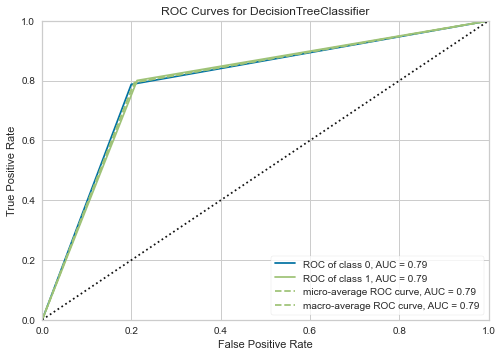

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [65]:
visualizer = ROCAUC(dt, classes=dt.classes_)
visualizer.fit(X_train, y_train)                    # Fit the training data to the visualizer
visualizer.score(X_test, y_test.astype(int))        # Evaluate the model on the test data
visualizer.show()

## With GridSearchCV

In [78]:
dt_gscv=DecisionTreeClassifier()
cv = StratifiedKFold(5)
param_val = [{'criterion':['entropy','gini'],'min_samples_split':np.arange(2,100,2)}]
#grid search configuration
grid = GridSearchCV(dt_gscv, param_val, cv = cv,scoring='roc_auc_ovr')
#fitting into our data
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])}],
             scoring='roc_auc_ovr')

In [79]:
print(grid.best_score_)
print(grid.best_params_)

0.861006192402721
{'criterion': 'gini', 'min_samples_split': 76}


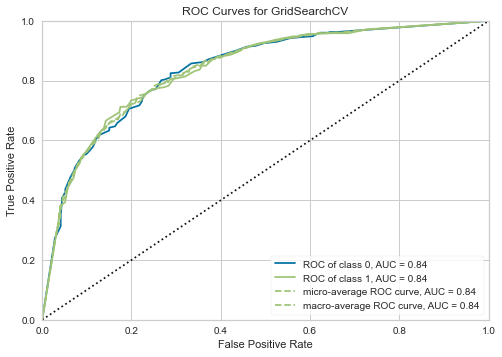

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
visualizer = ROCAUC(grid, classes=grid.classes_)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test,y_test.astype(int))        # Evaluate the model on the test data
visualizer.show()  

Classification Report: 
               precision    recall  f1-score   support

         low       0.81      0.79      0.80       428
        high       0.77      0.80      0.79       386

    accuracy                           0.79       814
   macro avg       0.79      0.79      0.79       814
weighted avg       0.79      0.79      0.79       814
 

Accuracy on train:   0.933 

Accuracy on test:  0.839 



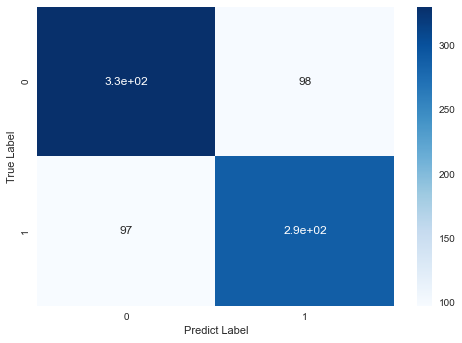

In [87]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred, target_names=["low","high"]),'\n')
print("Accuracy on train:  ",grid.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",grid.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_gscv).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()